## XGBoost Regression Integration

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

filename = 'chartEventsPred.csv' # Insert the file path here

df = pd.read_csv(filename)


df.head(10)


,subject_id,label,charttime,glucose,next_glucose,mean_last3,std_last3,trend,BUN,Blood Pressure,Creatinine,Diastolic Blood Pressure,Heart Rate,Hemoglobin,O2 saturation pulseoxymetry,PTT,Respiratory Rate,Sodium (serum),Systolic Blood Pressure,WBC
0,10000690,normal,2150-11-03 02:56:00,77.0,84.0,77.000000,NaN,NaN,20.2,74.936170,0.82,60.361702,84.072917,10.175,95.702128,NaN,22.557895,135.2,122.893617,6.35
1,10000690,normal,2150-11-04 03:03:00,84.0,117.0,80.500000,4.949747,7.0,20.2,74.936170,0.82,60.361702,84.072917,10.175,95.702128,NaN,22.557895,135.2,122.893617,6.35
2,10000690,normal,2150-11-04 10:00:00,117.0,120.0,92.666667,21.361960,33.0,20.2,74.936170,0.82,60.361702,84.072917,10.175,95.702128,NaN,22.557895,135.2,122.893617,6.35
3,10000690,normal,2150-11-04 17:54:00,120.0,107.0,107.000000,19.974984,3.0,20.2,74.936170,0.82,60.361702,84.072917,10.175,95.702128,NaN,22.557895,135.2,122.893617,6.35
4,10000690,normal,2150-11-05 05:36:00,107.0,97.0,114.666667,6.806859,-13.0,20.2,74.936170,0.82,60.361702,84.072917,10.175,95.702128,NaN,22.557895,135.2,122.893617,6.35
5,10000980,normal,2189-06-27 10:00:00,110.0,109.0,110.000000,NaN,NaN,NaN,97.545455,NaN,83.272727,73.636364,NaN,98.909091,NaN,20.545455,NaN,142.454545,NaN
6,10001217,normal,2157-11-21 03:16:00,113.0,145.0,113.000000,NaN,NaN,9.5,88.673469,0.45,77.720000,86.711538,11.750,95.019231,32.7,19.038462,138.5,126.900000,13.70
7,10001217,normal,2157-12-19 22:00:00,145.0,113.0,129.000000,22.627417,32.0,9.5,88.673469,0.45,77.720000,86.711538,11.750,95.019231,32.7,19.038462,138.5,126.900000,13.70
8,10001725,normal,2110-04-11 17:30:00,161.0,146.0,161.000000,NaN,NaN,17.0,70.062500,0.80,61.187500,79.156250,13.250,98.225806,30.6,17.531250,139.0,100.406250,18.55
9,10001725,normal,2110-04-11 18:02:00,146.0,152.0,153.500000,10.606602,-15.0,17.0,70.062500,0.80,61.187500,79.156250,13.250,98.225806,30.6,17.531250,139.0,100.406250,18.55


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050293 entries, 0 to 1050292
Data columns (total 20 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   subject_id                   1050293 non-null  int64  
 1   label                        1050293 non-null  object 
 2   charttime                    1050293 non-null  object 
 3   glucose                      1050293 non-null  float64
 4   next_glucose                 1050293 non-null  float64
 5   mean_last3                   1050293 non-null  float64
 6   std_last3                    1008303 non-null  float64
 7   trend                        1008303 non-null  float64
 8   BUN                          1049809 non-null  float64
 9   Blood Pressure               1050101 non-null  float64
 10  Creatinine                   1049824 non-null  float64
 11  Diastolic Blood Pressure     1050138 non-null  float64
 12  Heart Rate                   1050293 non-n

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from xgboost import XGBRegressor

# Drop non-numeric or ID/timestamp columns
df_model = df.drop(columns=['subject_id', 'label', 'charttime'])

# Drop rows with missing target or features
df_model = df_model.dropna()

# Define features (X) and target (y)
X = df_model.drop(columns=['next_glucose'])
y = df_model['next_glucose']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# x scale
x_scaler = StandardScaler()

X_train_scaled = x_scaler.fit_transform(X_train)

X_test_scaled = x_scaler.transform(X_test)

# y scale

y_scaler = StandardScaler()

y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1,1))

y_test_scaled = y_scaler.transform(y_test.values.reshape(-1,1))


# Initialize and train XGBoost Regressor
model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
model.fit(X_train_scaled, y_train_scaled.ravel())

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
y_pred_inv = y_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = y_scaler.inverse_transform(y_test_scaled)

# Evaluate on original scale
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


RMSE: 36.24
R2 Score: 0.57


In [16]:

from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import numpy as np

def XGModel(n_est=100, max_dep=5, learning_rt=0.1):


    model = XGBRegressor(n_estimators=n_est, max_depth=max_dep, learning_rate=learning_rt)
    model.fit(X_train_scaled, y_train_scaled)

    y_pred = model.predict(X_test_scaled)

    y_pred = model.predict(X_test_scaled)

    # Evaluate
    y_pred_inv = y_scaler.inverse_transform(y_pred.reshape(-1, 1))
    y_test_inv = y_scaler.inverse_transform(y_test_scaled)

    # Evaluate on original scale
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    r2 = r2_score(y_test_inv, y_pred_inv)
    
    

    return rmse, r2

model = XGModel()

print(f"RMSE: {model[0]:.2f}")
print(f"R2 Score: {model[1]:.2f}")
print(type(model))


def createPlot(x_axis, y_axis, x_label, y_label, title):
    plt.plot(x_axis,y_axis)
    plt.xlabel(x_label)           # e.g., 'Epoch'
    plt.ylabel(y_label)           # e.g., 'Accuracy'
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()



RMSE: 36.24
R2 Score: 0.57
<class 'tuple'>


/tmp/ipykernel_82842/952789218.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


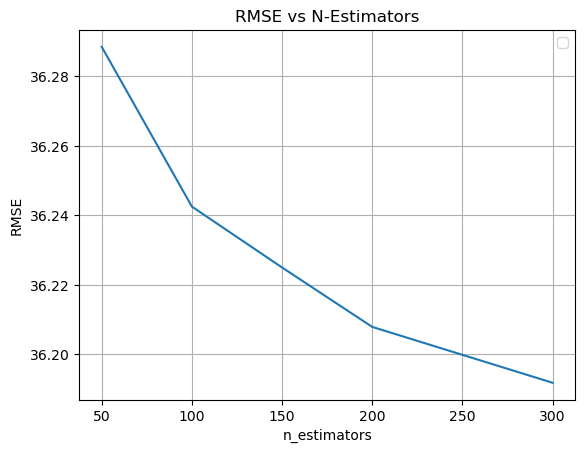

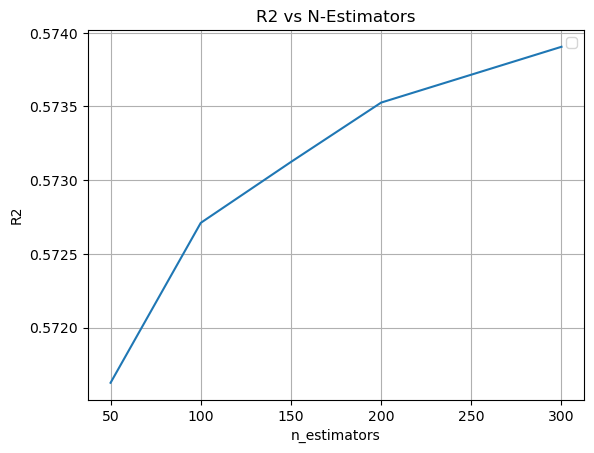

In [17]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 300],
    'max_depth': [3, 5, 7, 9, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

rmse_y = []
r2_y = []


for i in param_grid['n_estimators']:
    temp = XGModel(n_est=i)
    
    rmse_y.append(temp[0])
    r2_y.append(temp[1])



createPlot(param_grid['n_estimators'], rmse_y, "n_estimators", "RMSE", "RMSE vs N-Estimators")

createPlot(param_grid['n_estimators'], r2_y, "n_estimators", "R2", "R2 vs N-Estimators")



/tmp/ipykernel_82842/952789218.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


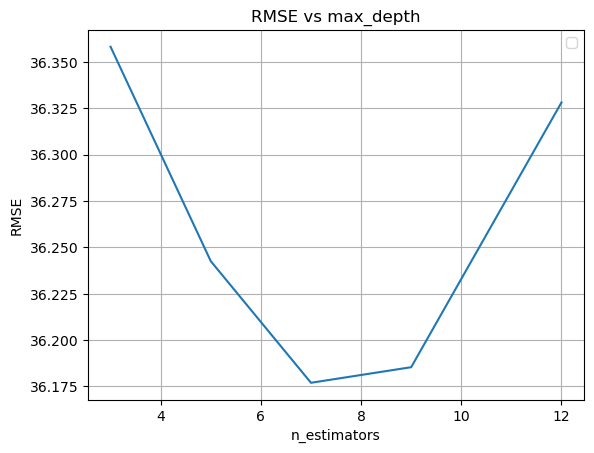

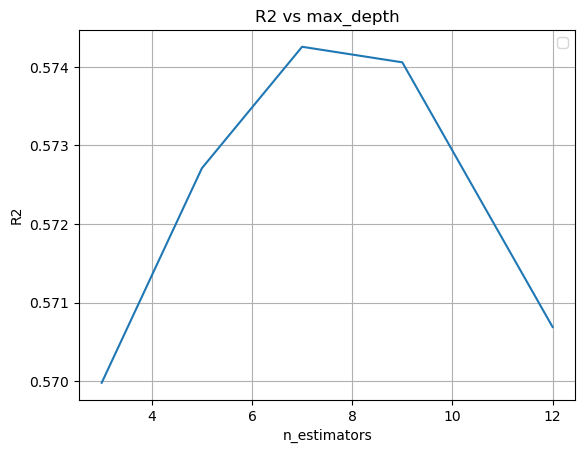

In [18]:
rmse_y = []
r2_y = []


for i in param_grid['max_depth']:
    temp = XGModel(max_dep=i)
    
    rmse_y.append(temp[0])
    r2_y.append(temp[1])



createPlot(param_grid['max_depth'], rmse_y, "n_estimators", "RMSE", "RMSE vs max_depth")

createPlot(param_grid['max_depth'], r2_y, "n_estimators", "R2", "R2 vs max_depth")



/tmp/ipykernel_82842/952789218.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


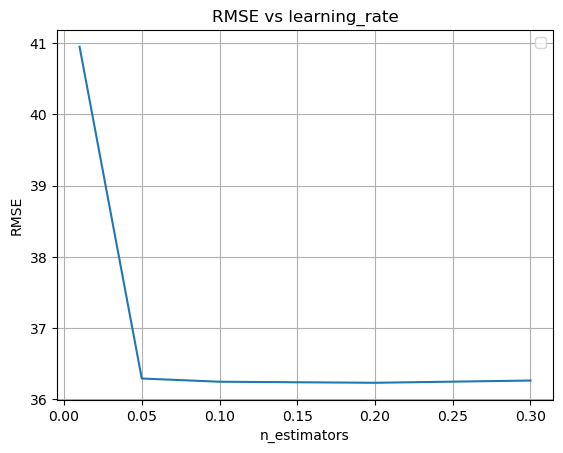

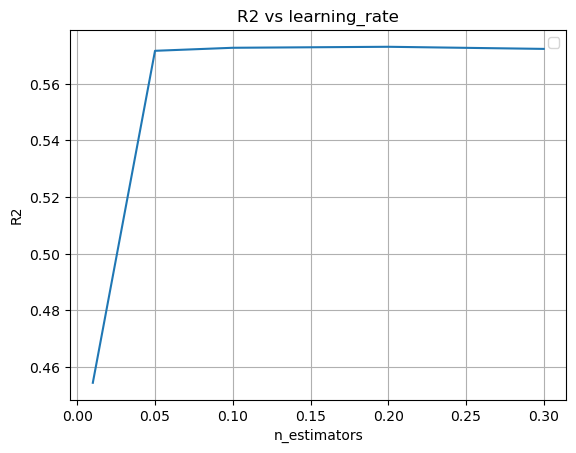

In [19]:
rmse_y = []
r2_y = []


for i in param_grid['learning_rate']:
    temp = XGModel(learning_rt=i)
    
    rmse_y.append(temp[0])
    r2_y.append(temp[1])



createPlot(param_grid['learning_rate'], rmse_y, "n_estimators", "RMSE", "RMSE vs learning_rate")

createPlot(param_grid['learning_rate'], r2_y, "n_estimators", "R2", "R2 vs learning_rate")



Overall best params are n_estimators 150, max_depth 7, and learning_rate of 0.1

In [20]:
model = XGModel(n_est=150, max_dep=7, learning_rt=0.1)

print(f"RMSE: {model[0]:.2f}")
print(f"R2 Score: {model[1]:.2f}")



RMSE: 36.17
R2 Score: 0.57


XGBoost Classification

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier



df_model = df.drop(columns=["subject_id", "charttime", "glucose", "next_glucose"])

df_model.dropna(inplace=True)

le = LabelEncoder()
df_model["label"] = le.fit_transform(df_model["label"])

X = df_model.drop(columns=["label"])
y = df_model["label"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


xgb_model = XGBClassifier(eval_metric="mlogloss", random_state=42)
xgb_model.fit(X_train_scaled, y_train)


y_pred = xgb_model.predict(X_test_scaled)

report = classification_report(y_test, y_pred, target_names=le.classes_)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print(report)

Accuracy: 0.8730
              precision    recall  f1-score   support

       hyper       0.74      0.57      0.65     36197
        hypo       0.55      0.03      0.05      2463
      normal       0.89      0.96      0.92    157842

    accuracy                           0.87    196502
   macro avg       0.73      0.52      0.54    196502
weighted avg       0.86      0.87      0.86    196502



In [15]:
'''

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 9, 15],
    'learning_rate': [0.1, 0.2]
}


xgb_model = XGBClassifier()

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

'''

'\n\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    \'n_estimators\': [50, 100, 150],\n    \'max_depth\': [3, 5, 9, 15],\n    \'learning_rate\': [0.1, 0.2]\n}\n\n\nxgb_model = XGBClassifier()\n\ngrid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring=\'accuracy\')\n\ngrid_search.fit(X_train, y_train)\n\nprint("Best set of hyperparameters: ", grid_search.best_params_)\nprint("Best score: ", grid_search.best_score_)\n\n'

Had to iteractively find the best params because gridsearch doesn't work for xgboost for some reason

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
import itertools


df_model = df.drop(columns=["subject_id", "charttime", "glucose", "next_glucose"])


df_model.dropna(inplace=True)

le = LabelEncoder()
df_model["label"] = le.fit_transform(df_model["label"])


X = df_model.drop(columns=["label"])
y = df_model["label"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, 9, 15],
    'learning_rate': [0.1, 0.2]
}

# Generate all combinations
keys, values = zip(*param_grid.items())
param_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

best_acc = 0
best_params = None
best_report = None

for params in param_combinations:
    print(f"Training with params: {params}")
    model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, **params)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    
    if acc > best_acc:
        best_acc = acc
        best_params = params
        best_report = classification_report(y_test, y_pred, target_names=le.classes_)
    print("-" * 40)

print("\nBest Parameters:", best_params)
print("Best Accuracy:", best_acc)
print("Classification Report for Best Model:\n", best_report)


Training with params: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8701
----------------------------------------
Training with params: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.2}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

Accuracy: 0.8708
----------------------------------------
Training with params: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8717
----------------------------------------
Training with params: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.2}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8719
----------------------------------------
Training with params: {'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.1}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8722
----------------------------------------
Training with params: {'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.2}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8726
----------------------------------------
Training with params: {'n_estimators': 50, 'max_depth': 9, 'learning_rate': 0.1}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8726
----------------------------------------
Training with params: {'n_estimators': 50, 'max_depth': 9, 'learning_rate': 0.2}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8727
----------------------------------------
Training with params: {'n_estimators': 50, 'max_depth': 15, 'learning_rate': 0.1}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8709
----------------------------------------
Training with params: {'n_estimators': 50, 'max_depth': 15, 'learning_rate': 0.2}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8700
----------------------------------------
Training with params: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8706
----------------------------------------
Training with params: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8713
----------------------------------------
Training with params: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8719
----------------------------------------
Training with params: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.2}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8723
----------------------------------------
Training with params: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8726
----------------------------------------
Training with params: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.2}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8731
----------------------------------------
Training with params: {'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.1}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8731
----------------------------------------
Training with params: {'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.2}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8728
----------------------------------------
Training with params: {'n_estimators': 100, 'max_depth': 15, 'learning_rate': 0.1}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8708
----------------------------------------
Training with params: {'n_estimators': 100, 'max_depth': 15, 'learning_rate': 0.2}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8699
----------------------------------------
Training with params: {'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.1}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8709
----------------------------------------
Training with params: {'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.2}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8717
----------------------------------------
Training with params: {'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.1}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8722
----------------------------------------
Training with params: {'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.2}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8726
----------------------------------------
Training with params: {'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.1}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8730
----------------------------------------
Training with params: {'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.2}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8732
----------------------------------------
Training with params: {'n_estimators': 150, 'max_depth': 9, 'learning_rate': 0.1}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8732
----------------------------------------
Training with params: {'n_estimators': 150, 'max_depth': 9, 'learning_rate': 0.2}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8727
----------------------------------------
Training with params: {'n_estimators': 150, 'max_depth': 15, 'learning_rate': 0.1}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8708
----------------------------------------
Training with params: {'n_estimators': 150, 'max_depth': 15, 'learning_rate': 0.2}


/home/andyyythan/.conda/envs/xgb_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8698
----------------------------------------

Best Parameters: {'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.2}
Best Accuracy: 0.87322775340709
Classification Report for Best Model:
               precision    recall  f1-score   support

       hyper       0.75      0.57      0.65     36197
        hypo       0.55      0.03      0.05      2463
      normal       0.89      0.96      0.92    157842

    accuracy                           0.87    196502
   macro avg       0.73      0.52      0.54    196502
weighted avg       0.86      0.87      0.86    196502



Best Params for classification is n_estimators 150, max_depth 9, learning_rate 0.1.

In [ ]:
# Initialize and train the XGBoost model
xgb_model = XGBClassifier(eval_metric="mlogloss", random_state=42, n_estimators=150, max_depth=7, learning_rate=0.2)
xgb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test_scaled)


print(accuracy_score(y_test,y_pred))
# Classification report
report = classification_report(y_test, y_pred, target_names=le.classes_)

print(report)

0.8729733030707066
              precision    recall  f1-score   support

       hyper       0.74      0.57      0.65     36197
        hypo       0.63      0.02      0.04      2463
      normal       0.89      0.96      0.92    157842

    accuracy                           0.87    196502
   macro avg       0.76      0.52      0.54    196502
weighted avg       0.86      0.87      0.86    196502

